# DEA accredited proejcts analysis 2019-2025

## import libraries and data

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [544]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [545]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


## Tidy the data

In [546]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [547]:
missing_researchers = df[df['Researchers'].isna()]

In [548]:
missing_datasets = df[df['Datasets Used'].isna()]

In [549]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [550]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [551]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

What's the difference between the DEA and SRSA? 
| Aspect                       | **SRSA (2007)**                                   | **DEA (2017)**                                                 |
| ---------------------------- | ------------------------------------------------- | -------------------------------------------------------------- |
| **Legal Authority**          | Statistics and Registration Service Act 2007      | Digital Economy Act 2017 – Chapter 5 (Research Strand)         |
| **Main Data Custodian**      | Office for National Statistics (ONS) only         | Any specified public authority (incl. ONS, NHS, DWP, etc.) |
| **Scope of Data Sharing**    | ONS data only                                     | Cross-government administrative data                           |
| **Type of Research**         | Purely **statistical** purposes                   | Broader research (including policy evaluation)             |
| **Researcher Accreditation** | Required – via UK Statistics Authority (UKSA)     | Required – same UKSA framework                                 |
| **Secure Access Required**   | Yes (e.g. Secure Research Service)                | Yes (e.g. via an accredited processor or secure lab)           |
| **Public Benefit Test**      | Yes                                               | Yes                                                            |
| **Data Sharing Permissions** | Limited to non-identifying, statistical data only | Can include de-identified **admin** data for wider use         |
| **Oversight Body**           | UK Statistics Authority (and ONS)                 | UK Statistics Authority (with DEA Governance Board input)      |




In [552]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

In [553]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [554]:
problematic_dates = df[pd.isna(pd.to_datetime(df['Accreditation Date'], errors='coerce'))]
print(problematic_dates['Accreditation Date'].unique())

['2020-06-11' '2020-12-07' '2021-11-02' '2021-09-14' '2021-09-24'
 '2021-09-17' '2021-10-05' '2021-10-13' '2021-10-26' '2021-10-12'
 '2021-12-10' '2021-03-15' '2023-01-18' '2023-03-06' '2023-03-09'
 '2023-01-03' '2023-04-05' '2023-01-30' '2023-01-17' '2023-04-19'
 '2023-01-20' '2023-02-03' '2023-01-19' '2023-03-02' '2023-03-05'
 '2023-03-21' '2023-04-11' '2023-03-31' '2023-01-11' '2023-03-07'
 '2023-04-04' '2023-02-10' '2023-01-04' '2023-03-20' '2023-01-23'
 '2023-03-03' '2023-02-16' '2023-02-07' '2023-03-23' '2023-02-13'
 '2023-02-24' '2023-04-18' '2023-02-15' '2023-01-22' '2023-03-27'
 '2023-02-22' '2023-01-06' '2023-04-13' '2023-01-13' '2023-01-16'
 '2023-02-02' '2023-03-08' '2023-04-06' '2023-03-24' '2023-03-30'
 '2023-05-02' '2023-05-09' '2023-05-24' '2023-06-02' '2023-06-07'
 '2023-06-13' '2023-06-19' '2023-06-20' '2023-06-22' '2023-05-12'
 '2023-06-05' '13/07/2023' '28/07/2023' '31/07/2023' '17/08/2023'
 '18/08/2023' '30/08/2023' '18/09/2023' '19/09/2023' '20/09/2023'
 '27/09/20

In [555]:
# Function to handle the various date formats in the dataset
def parse_mixed_date_formats(date_str):
    if pd.isna(date_str):
        return pd.NaT
        
    # Try different date formats
    formats = [
        '%Y-%m-%d',     # YYYY-MM-DD (2023-01-30)
        '%d/%m/%Y',     # DD/MM/YYYY (13/07/2023)
        '%m/%d/%Y',     # MM/DD/YYYY (potentially some US dates)
    ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
            
    # If nothing worked, return NaT
    return pd.NaT

# Apply the custom parser to the Accreditation Date column
df['Accreditation Date'] = df['Accreditation Date'].apply(parse_mixed_date_formats)

# Check if we still have any NaN values
print(df['Accreditation Date'].isna().sum())

0


In [556]:
df['Accreditation Date Quarter'] = df['Accreditation Date'].dt.to_period('Q')

In [557]:
# Manually rectify single 2019Q1 error
df.loc[16, 'Accreditation Date Quarter'] = '2019Q4'

In [559]:
df[df['Accreditation Date Quarter'] == '2019Q4']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2019-10-25,2019Q4
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2019-10-25,2019Q4
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-11-19,2019Q4
5,2019/009,Functional specialisation and their linkages b...,"Joanna Jedrasaiak, ARUP\nEnrico Vanino, Univer...",Digital Economy Act 2017,Office for National Statistics: Business Struc...,Office for National Statistics Secure Research...,2019-10-14,2019Q4
6,2019/010,Diversity in the Creative Industries,"Danielle Cox, Office for National Statistics",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-31,2019Q4
7,2019/011,Modelling Return on Investment at the firm level,"Chris Dimos, University of Bath",Digital Economy Act 2017,"Department for Business, Energy & Industrial S...",Office for National Statistics Secure Research...,2019-10-14,2019Q4
8,2019/012,The impact of the immigration white paper on t...,"Patrick Deshpande, Oxford Economics",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4
9,2019/013,TechNation programme evaluation,"Thomas Baily, Frontier Economics\nEli Daniels,...",Digital Economy Act 2017,Office for National Statistics: Business Struc...,Office for National Statistics Secure Research...,2019-10-14,2019Q4


In [534]:
df.sample(10)

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list
378,2022/082,Internationalisation and Innovation Novelty: E...,"Ruoying Zhou, University of Leicester",Digital Economy Act 2017,Office for National Statistics: Longitudinal S...,UK Data Archive,2022-08-06,2022Q3,office for national statistics: longitudinal s...,[longitudinal small business survey]
115,2020/115,Evaluation of the Scale-Up North East Pilot Pr...,"Matthew Stephenson,\nRSM UK",Digital Economy Act 2017,Office for National Statistics: Business Struc...,Office for National Statistics Secure Research...,2020-07-12,2020Q3,office for national statistics: business struc...,[business structure database]
370,2022/061,Understanding the impact of migration on popul...,"Alison Sizer, University of London ­- Universi...",Digital Economy Act 2017,Office for National Statistics: Longitudinal S...,Office of National Statistics Secure Research ...,2022-04-05,2022Q2,office for national statistics: longitudinal s...,[longitudinal study of england and wales]
966,2024/162,Symptom reporting and health care seeking: com...,"Louise Smith, UK Health Security Agency",Digital Economy Act 2017,"Office for National Statistics, University of ...",Office for National Statistics Secure Research...,2024-08-16,2024Q3,"office for national statistics, university of ...",[covid-19 infection survey - uk]
1012,2024/238,Exploring the role of Sociodemographic Charact...,"Sonia Ilie, University of Cambridge\nKonstanti...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-12-05,2024Q4,"qualifications wales, department for education...",[grading and admissions data england-ofqual-df...
9,2019/013,TechNation programme evaluation,"Thomas Baily, Frontier Economics\nEli Daniels,...",Digital Economy Act 2017,Office for National Statistics: Business Struc...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,office for national statistics: business struc...,[business structure database]
16,2019/021,Social and Economic Predictors of the severe m...,"Jayati Das-Munshi, King's College London\nLuka...",Digital Economy Act 2017,Office for National Statistics: Census 2011 & ...,Office for National Statistics Secure Research...,2019-03-12,2019Q1,office for national statistics: census 2011 & ...,[census 2011 & death registrations]
583,2023/085,Evaluating green skills in London,"Prabhat Vaze, Belmana\nLorenzo Marzano, Belman...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2023-06-13,2023Q2,office for national statistics: annual populat...,[annual population survey - uk]
581,2023/082,Inequalities in pension saving and labour mark...,"Jonathan Cribb, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2023-06-07,2023Q2,office for national statistics: annual survey ...,[annual survey of hours and earnings linked to...
371,2022/064,The Effect of Starting School Age on Human Cap...,"Anthony Higney, University of Stirling",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-04-14,2022Q2,office for national statistics: annual populat...,"[annual population survey, wealth and assets s..."


In [496]:
import re

def extract_datasets(row):
    """
    Extract dataset names from the 'Datasets Used' column.
    Handles multiple data sources and newlines, but doesn't filter values.
    """
    if pd.isna(row) or row == "":
        return []
    
    # Replace newlines and normalize other separators
    processed = row.replace("\n", ";").replace("\\n", ";")
    
    results = []
    
    # Split by semicolons to handle multiple data sources
    for entry in processed.split(";"):
        entry = entry.strip()
        if not entry:
            continue
        
        # Handle the case with or without a data source (colon)
        if ":" in entry:
            # Split only on the first colon
            parts = entry.split(":", 1)
            datasets = parts[1].strip()
            
            # Skip if there's nothing after the colon
            if not datasets:
                continue
        else:
            datasets = entry
        
        # Split by commas and process each dataset
        for ds in datasets.split(","):
            ds = ds.strip()
            
            # Only skip empty strings
            if not ds:
                continue
            
            results.append(ds)
    
    return results

In [497]:
# lowercase the datasets used column
df["datasets_clean"] = df["Datasets Used"].str.lower()

# apply the function to create a list of dataset names
df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x) if pd.notnull(x) else [])

# explode the dataset list to one dataset per row
df_exploded = df.explode("dataset_list")



In [498]:
df_exploded

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,office for national statistics: annual respond...,annual respondents database
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,office for national statistics: annual populat...,annual population survey
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,office for national statistics: crime survey f...,crime survey for england and wales
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,office for national statistics: labour force s...,labour force survey & annual population survey
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-11-19,2019Q4,office for national statistics: labour force s...,labour force survey & annual population survey
...,...,...,...,...,...,...,...,...,...,...
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,office for national statistics: annual populat...,labour force survey person
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,office for national statistics: annual populat...,labour force survey household
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,office for national statistics: annual populat...,childcare and early years survey of parents
1151,2025/114,Marie Curie End of Life Transformation,"Lynne Hughes, Marie Curie\nMichelle Vermeulen",Digital Economy Act 2017,SAIL Databank: Census Wales 2021,SAIL,2025-05-12,2025Q2,sail databank: census wales 2021,census wales 2021


In [499]:
df_exploded[df_exploded['dataset_list'] == "decision maker panel"]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list


In [500]:
df_exploded[df_exploded['Project ID'] == '2024/070']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,annual business survey
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,annual respondents
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,database 2
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,annual survey of hours
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,and earnings
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,annual survey of hours
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,and earnings longitudinal
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,business enterprise
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,research and
837,2024/070,The Labour Market Impacts of Brexit,"Nikhil Datta, University of Warwick\nMarco Gas...",Digital Economy Act 2017,Office for National Statistics:\nAnnual Busine...,Office for National Statistics Secure Research...,2024-05-07,2024Q2,office for national statistics:\nannual busine...,development ­ great


In [501]:
# Handle common suffix mismatches
def remove_suffixes(dataset_name):
    """
    Remove common suffixes from dataset names to standardise them.
    """
    suffixes = [" - uk",
                " - england",
                " - great britain",
                " - gb",
                " - england and wales",
                " - wales",
                "srs iteration 1 standard extract",
                "srs iteration 2 standard extract",
                "uk",
                "person",
                "-ofqual-dfe-ucas",
                "wave 1",
                "wave 2 - exclusions",
                "wave 2",
                " - ",
                "finalised",
                "individual"]
    for suffix in suffixes:
        if dataset_name.endswith(suffix):
            dataset_name = dataset_name[:-len(suffix)].strip()
    return dataset_name

In [502]:
df_exploded['dataset_list_clean'] = df_exploded['dataset_list'].apply(remove_suffixes)
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual business survey,191
2,annual survey of hours and earnings,153
3,annual population survey,132
4,labour force survey,112
...,...,...
561,secure origin,1
562,leo,1
563,2007-2021,1
564,census non,1


In [503]:
# Clean up dataset abbreviated names and mismatches
def clean_dataset_names_replace(dataset_name):
    """
    Clean up dataset names with common abbreviations or mismatches.
    """
    replacements = {
        "leo via": "longitudinal education outcomes",
        "leo": "longitudinal education outcomes",
        "longitudinal education outcomes srs iteration 1 standard extract - englanddfe": "longitudinal education outcomes",
        "longitudinal study": "ons longitudinal study",
        "universities and colleges admissions service": "grading and admissions data england",
        "ucas grading and admissions data": "grading and admissions data england",
        "2011 census": "census 2011",
        "labour force survey & labour force survey": "labour force survey",
        "ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first crown court defendant case level dataset": "data first: crown court dataset",
        "moj data first crown court defendant": "data first: crown court dataset",
        "retired ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first magistrates' court defendant": "data first: magistrates court dataset",
        "retired ministry of justice data first magistrates court defendant": "data first: magistrates court dataset",
        "ministry of justice data first magistrates court iteration 2": "data first: magistrates court dataset",
        "ministry of justice data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey level dataset": "data first: prisoner dataset",
        "moj data first linked criminal courts defendant case level dataset & moj data first magistrates' court defendant case level dataset": "data first: cross-justice system linking dataset",
        "data first: linked criminal courts dataset": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts and prisons defendant": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts defendant case level dataset": "data first: cross-justice system linking dataset",
        "moj data first prisoner custodial journey dataset": "data first: prisoner dataset",
        "data first prison iteration 2": "data first: prison dataset",
        "ministry of justice data first probation iteration 2": "data first: probation dataset",
        "ministry of justice data first crown court iteration 2": "data first: crown court dataset",
        "data first family court": "data first: family court dataset",
        "moj data first family court data extract": "data first: family court dataset",
        "data first familyman family court data": "data first: family court dataset",
        "ministry of justice data first probation": "data first: probation dataset",
        "quarterly labour force survey": "labour force survey",
        "business structure database: longitudinal": "business structure database longitudinal",
        "labour force survey five-quarter longitudinal dataset": "labour force survey longitudinal",
        "labour force survey two-quarter longitudinal dataset": "labour force survey longitudinal",
        "annual survey of hours": "annual survey of hours and earnings",
        "moj data first cross-justice system linking dataset – england and wales": "data first: cross-justice system linking dataset",
        "labour force survey -": "labour force survey",
        "moj data first probation": "data first: probation dataset",
        "longitudinal inter-departmental business register": "inter-departmental business register longitudinal",
        "growing up in england wave 2 - children in need": "growing up in england",
        "growing up in england wave 2 vulnerability measures": "growing up in england",
        "annual respondents": "annual respondents database",
        "annual respondents database x": "annual respondents database",
        "annual respondents database 2": "annual respondents database",
        "longitudinal inter­departmental business register": "inter-departmental business register longitudinal",
        "administrative data | agriculture research collection": "agriculture research collection",
        "bespoke admin data: agricultural research collection": "agriculture research collection",
        "ashe longitudinal data england and wales": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data england": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data great britain": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings longitudinal": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings / census 2011 linked datase": "annual survey of hours and earnings linked to census 2011",
        "education and child health insights from linked data research database": "education and child health insights from linked data",
        }
    
    for key, value in replacements.items():
        if dataset_name.startswith(key):
            return value
    return dataset_name

In [504]:
# Apply the clean_dataset_names_replace function to the dataset list
df_exploded['dataset_list_clean'] = df_exploded['dataset_list_clean'].apply(clean_dataset_names_replace)

In [505]:
# Drop some obvious nonsense from the exploded dataset
df_exploded = df_exploded[~df_exploded['dataset_list_clean'].isin(["", "nhs", "england", "england and wales", "index", "great britain", "patents", "survey", "wales and scotland", "ons","covid-19","and earnings", "wales", "university of oxford"])]

In [520]:
df_exploded[df_exploded['dataset_list_clean'] == 'annual survey of hours and earnings longitudinal']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list,dataset_list_clean
217,2021/080,"Parenting Style, Parental Investment, and the ...","Marc Stoeckli,\nIfo Institute for Economic Res...",Digital Economy Act 2017,Office for National Statistics: ASHE Longitudi...,Office of National Statistics Secure Research ...,2021-08-19,2021Q3,office for national statistics: ashe longitudi...,ashe longitudinal data ­ england,annual survey of hours and earnings longitudinal
235,2021/094,The impact of COVID­-19 on unemployment and ea...,"David Zentler-Munro,\nUniversity College Londo...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2021-08-13,2021Q3,office for national statistics: annual survey ...,ashe longitudinal,annual survey of hours and earnings longitudinal
256,2021/147,Intergenerational Inequalities: sources across...,"Gabriele Guaitoli,\nUniversity of Warwick\nBea...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2021-01-10,2021Q1,office for national statistics: annual survey ...,annual survey for hours and earnings longitudinal,annual survey of hours and earnings longitudinal
373,2022/069,Investigation into the use of ASHE data for as...,"Grace Lockyer, Department for International Tr...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2022-04-26,2022Q2,office for national statistics: annual survey ...,ashe longitudinal data ­ england,annual survey of hours and earnings longitudinal
375,2022/077,Employment Allowance National Insurance Contri...,"Scott Carter, IPSOS MORI\nAndrew Whitehead, IP...",Digital Economy Act 2017,Office for National Statistics: ASHE Longitudi...,Office of National Statistics Secure Research ...,2022-10-05,2022Q4,office for national statistics: ashe longitudi...,ashe longitudinal data england,annual survey of hours and earnings longitudinal
382,2022/062,"Covid-19, Labour Productivity and Regional Pol...","Isabelle Bi, University of Bristol,\nAnna Ceri...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-04-28,2022Q2,office for national statistics: annual populat...,ashe longitudinal data england and wales,annual survey of hours and earnings longitudinal
382,2022/062,"Covid-19, Labour Productivity and Regional Pol...","Isabelle Bi, University of Bristol,\nAnna Ceri...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-04-28,2022Q2,office for national statistics: annual populat...,ashe longitudinal data great britain,annual survey of hours and earnings longitudinal
387,2022/081,"Wages, wage dynamics and employment","Claire Crawford, UCL Institute of Education\nA...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-05-20,2022Q2,office for national statistics: annual populat...,ashe longitudinal data england and wales,annual survey of hours and earnings longitudinal


In [506]:
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual survey of hours and earnings,212
2,annual business survey,191
3,labour force survey,162
4,annual population survey,132
...,...,...
468,telephone-operated crime survey for england an...,1
469,crime survey for england and wales 1996 - 2011,1
470,waves 1-14,1
471,wales indexed,1


In [507]:
# All projects accessed a total number of datasets over 2800
all_datasets_df['count'].sum()

np.int64(2757)

## Some quick summary findings
- We have over 1000 projects approved under the DEA between [check month] 2019 - May 2025. 
- Projects applied to reuse an overall total of >2800 datasets 

In [521]:
# ADR UK flagship datasets
flagship_datasets = ['agriculture research collection', 
                     'annual survey of hours and earnings linked to census 2011',
                     'annual survey of hours and earnings longitudinal',
                     'annual survey of hours and earnings linked to PAYE and self-assessment data',
                     'data first: cross-justice system linking dataset',
                     'data first: family court linked to cafcass and census 2021',
                     'education and child health insights from linked data',
                     'grading and admissions data england',
                     'growing up in england',
                     'longitudinal education outcomes',
                     'moj and dfe linked dataset', # note that this data is not accessed under the DEA so isn't in this dataset
                     'nursing and midwifery council register linked to census 2021',
                     'data first: magistrates court dataset', 
                     'data first: crown court dataset', 
                     'data first: family court dataset', 
                     'data first: civil court data', 
                     'data first: prisoner dataset',
                     'data first: probation dataset']

In [524]:
data_flagship = df_exploded[df_exploded['dataset_list_clean'].isin(flagship_datasets)]
data_flagship[data_flagship['dataset_list_clean'] == 'annual survey of hours and earnings longitudinal']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list,dataset_list_clean
217,2021/080,"Parenting Style, Parental Investment, and the ...","Marc Stoeckli,\nIfo Institute for Economic Res...",Digital Economy Act 2017,Office for National Statistics: ASHE Longitudi...,Office of National Statistics Secure Research ...,2021-08-19,2021Q3,office for national statistics: ashe longitudi...,ashe longitudinal data ­ england,annual survey of hours and earnings longitudinal
235,2021/094,The impact of COVID­-19 on unemployment and ea...,"David Zentler-Munro,\nUniversity College Londo...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2021-08-13,2021Q3,office for national statistics: annual survey ...,ashe longitudinal,annual survey of hours and earnings longitudinal
256,2021/147,Intergenerational Inequalities: sources across...,"Gabriele Guaitoli,\nUniversity of Warwick\nBea...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2021-01-10,2021Q1,office for national statistics: annual survey ...,annual survey for hours and earnings longitudinal,annual survey of hours and earnings longitudinal
373,2022/069,Investigation into the use of ASHE data for as...,"Grace Lockyer, Department for International Tr...",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office of National Statistics Secure Research ...,2022-04-26,2022Q2,office for national statistics: annual survey ...,ashe longitudinal data ­ england,annual survey of hours and earnings longitudinal
375,2022/077,Employment Allowance National Insurance Contri...,"Scott Carter, IPSOS MORI\nAndrew Whitehead, IP...",Digital Economy Act 2017,Office for National Statistics: ASHE Longitudi...,Office of National Statistics Secure Research ...,2022-10-05,2022Q4,office for national statistics: ashe longitudi...,ashe longitudinal data england,annual survey of hours and earnings longitudinal
382,2022/062,"Covid-19, Labour Productivity and Regional Pol...","Isabelle Bi, University of Bristol,\nAnna Ceri...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-04-28,2022Q2,office for national statistics: annual populat...,ashe longitudinal data england and wales,annual survey of hours and earnings longitudinal
382,2022/062,"Covid-19, Labour Productivity and Regional Pol...","Isabelle Bi, University of Bristol,\nAnna Ceri...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-04-28,2022Q2,office for national statistics: annual populat...,ashe longitudinal data great britain,annual survey of hours and earnings longitudinal
387,2022/081,"Wages, wage dynamics and employment","Claire Crawford, UCL Institute of Education\nA...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office of National Statistics Secure Research ...,2022-05-20,2022Q2,office for national statistics: annual populat...,ashe longitudinal data england and wales,annual survey of hours and earnings longitudinal


### Overall use of ADR UK flagship datasets

In [514]:
data_flagship.groupby('dataset_list_clean').size().reset_index(name='count').sort_index(ascending=False)

,dataset_list_clean,count
12,longitudinal education outcomes,82
11,growing up in england,23
10,grading and admissions data england,34
9,education and child health insights from linke...,25
8,data first: probation dataset,8
7,data first: prisoner dataset,8
6,data first: magistrates court dataset,12
5,data first: family court dataset,3
4,data first: crown court dataset,20
3,data first: cross-justice system linking dataset,10


## Use of datasets over time

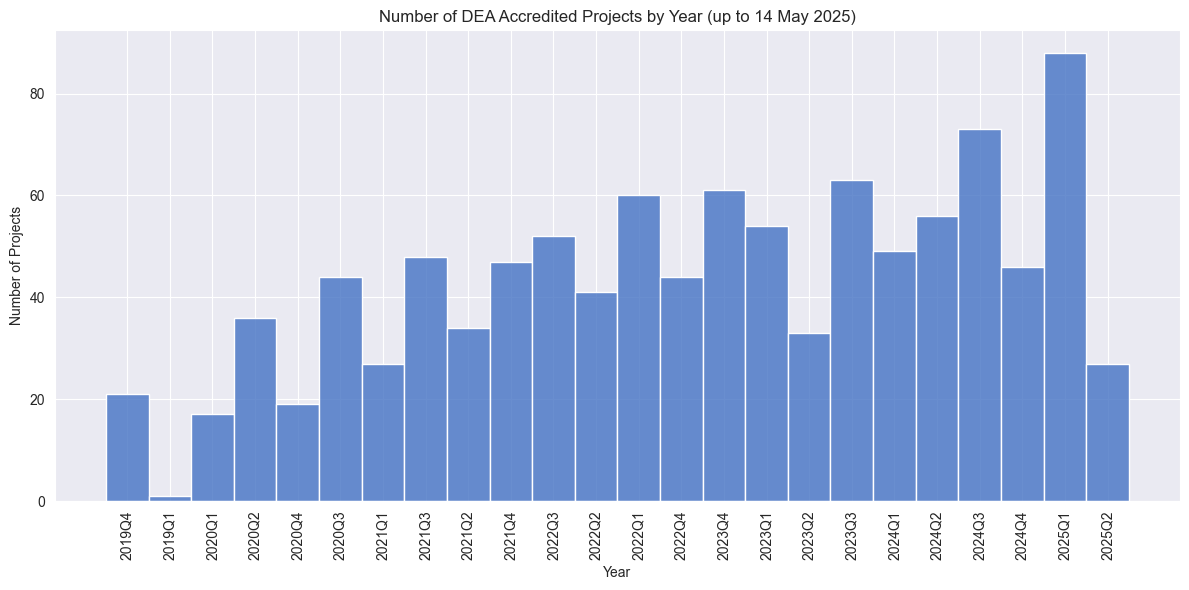

In [532]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(df['Accreditation Date Quarter'].astype(str), bins=20, color='#4472C4', 
    alpha=0.8,
    edgecolor='white',
    linewidth=1)
plt.title('Number of DEA Accredited Projects by Year (up to 14 May 2025)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Projects')
plt.tight_layout()

In [528]:
df

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,datasets_clean,dataset_list
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,office for national statistics: annual respond...,[annual respondents database]
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,office for national statistics: annual populat...,[annual population survey]
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,office for national statistics: crime survey f...,[crime survey for england and wales]
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,office for national statistics: labour force s...,[labour force survey & annual population survey]
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-11-19,2019Q4,office for national statistics: labour force s...,[labour force survey & annual population surve...
...,...,...,...,...,...,...,...,...,...,...
1148,2025/090,Exploring the Link Between Technological Adopt...,"Mariana Sofia Soares \nAraujo Barbosa, Univers...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-03-28,2025Q1,office for national statistics: annual busines...,"[annual business survey, e-commerce and digita..."
1149,2025/098,The NoRePF Project: Improving maternal and chi...,"Hannah Rayment-Jones, King's College London\nS...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-04-09,2025Q2,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from..."
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,office for national statistics: annual populat...,"[annual population survey, annual population s..."
1151,2025/114,Marie Curie End of Life Transformation,"Lynne Hughes, Marie Curie\nMichelle Vermeulen",Digital Economy Act 2017,SAIL Databank: Census Wales 2021,SAIL,2025-05-12,2025Q2,sail databank: census wales 2021,[census wales 2021]


In [22]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection']

In [256]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,datasets_clean,dataset_list
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,11/09/2022,office for national statistics: agricultural r...,agricultural research collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...
